<div style="color:black">

# 📊 P7: Predictive Machine Learning Project 🚀
**Author: Angie Crews**  

[GitHub Project Repository](https://github.com/Angie-Crews/datafun-07-ml)

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4e5.svg" alt="import icon" width="32" style="vertical-align:middle"> ***Import Statements***

</div>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4a1.svg" alt="action icon" width="32" style="vertical-align:middle"> ***Part 1 -- CC: Chart a Straight Line***

</div>

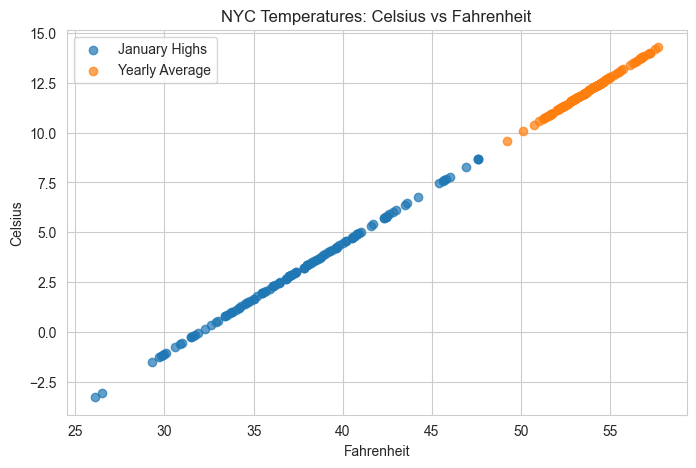

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV files into pandas dataframes
df_jan = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
df_yearly = pd.read_csv('ave_yearly_temp_nyc_1895-2017.csv')

# Assuming the temperature columns are in Fahrenheit, convert to Celsius
df_jan['Celsius'] = (df_jan['Value'] - 32) * 5/9
df_yearly['Celsius'] = (df_yearly['Value'] - 32) * 5/9

# Plot Celsius vs Fahrenheit for January highs
plt.figure(figsize=(8, 5))
plt.scatter(df_jan['Value'], df_jan['Celsius'], label='January Highs', alpha=0.7)
plt.scatter(df_yearly['Value'], df_yearly['Celsius'], label='Yearly Average', alpha=0.7)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius')
plt.title('NYC Temperatures: Celsius vs Fahrenheit')
plt.legend()
plt.show()

<div style="color:black">

### **Part 1 Wrap-Up**

Part 1 focused on visualizing NYC temperature data and exploring the relationship between Fahrenheit and Celsius for both January highs and yearly averages. The workflow included:

- **Data Loading:** Imported historical temperature datasets for NYC.
- **Data Transformation:** Converted Fahrenheit values to Celsius for easier comparison.
- **Visualization:** Plotted scatter charts to illustrate the correlation between Fahrenheit and Celsius temperatures for January and yearly averages.

These steps provided a foundational understanding of the dataset and demonstrated basic data visualization techniques, setting the stage for predictive modeling in subsequent sections.

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f52e.svg" alt="crystal ball icon" width="32" style="vertical-align:middle"> ***Part 2 -- Prediction***


<div style="color:black; font-weight:bold">

Section 1 - Data Acquisition

</div>

In [13]:
# Load NYC January high temperature data from CSV into a DataFrame named nyc_df
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Display the first few rows to verify
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


<div style="color:black; font-weight:bold">

Section 2 - Data Inspection

</div>

In [14]:
import pandas as pd

df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
print("Head of the data:")
print(df.head())
print("\nTail of the data:")
print(df.tail())

Head of the data:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail of the data:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


<div style="color:black; font-weight:bold">

Section 3 - Data Cleaning

</div>

In [15]:
# Clean the 'Date' column in df to extract the year as a four-digit number
df['Year'] = df['Date'].floordiv(100)
print("Head of the data:")
print(df[['Year', 'Value', 'Anomaly']].head())
print("\nTail of the data:")
print(df[['Year', 'Value', 'Anomaly']].tail())

Head of the data:
   Year  Value  Anomaly
0  1895   34.2     -3.2
1  1896   34.7     -2.7
2  1897   35.5     -1.9
3  1898   39.6      2.2
4  1899   36.4     -1.0

Tail of the data:
     Year  Value  Anomaly
119  2014   35.5     -1.9
120  2015   36.1     -1.3
121  2016   40.8      3.4
122  2017   42.8      5.4
123  2018   38.7      1.3


<div style="color:black; font-weight:bold">

Section 4 - Descriptive Statistics

</div>

In [16]:
# Set display precision for pandas
pd.set_option('display.precision', 2)

# Show descriptive statistics for the January high temperatures
print(df['Value'].describe())

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Value, dtype: float64


<div style="color:black; font-weight:bold">

Section 5 - Build the Model

</div>

In [17]:
from scipy.stats import linregress

# Calculate the slope and intercept for the best fit line
result = linregress(df['Year'], df['Value'])
slope = result.slope
intercept = result.intercept

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

Slope: 0.0148
Intercept: 8.6950


<div style="color:black; font-weight:bold">

Section 6 - Predict

</div>

In [18]:
# Predict the average high temperature in January for the year 2024
year_to_predict = 2024
predicted_temp = slope * year_to_predict + intercept
print(f"Predicted average high temperature in January for {year_to_predict}: {predicted_temp:.2f}°F")

Predicted average high temperature in January for 2024: 38.59°F


<div style="color:black; font-weight:bold">

Section 7 - Visualizations

</div>

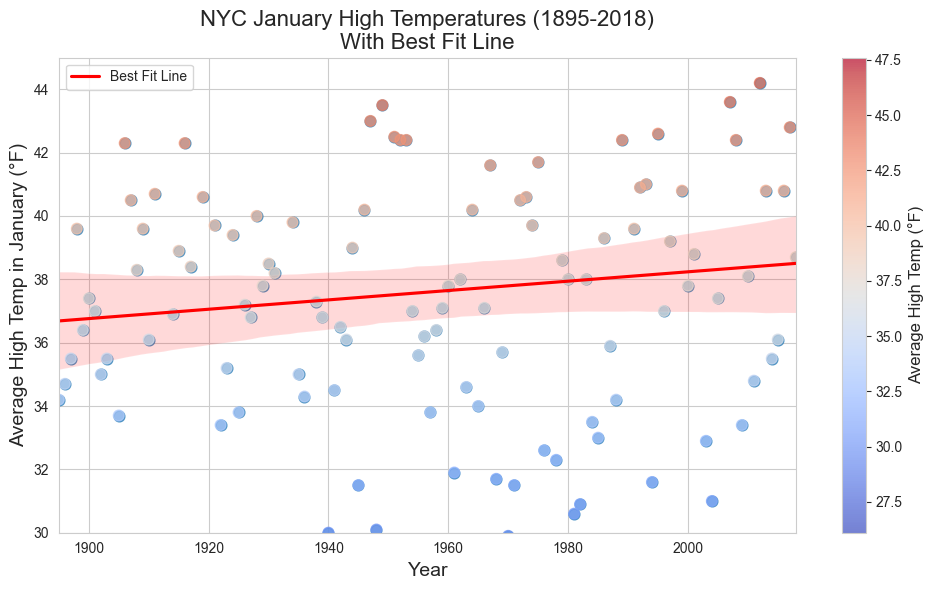

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Scatter plot with regression line
sns.regplot(
    x='Year', y='Value', data=df,
    scatter_kws={'s': 60, 'color': '#1f77b4', 'alpha': 0.7, 'label': 'Observed'},
    line_kws={'color': 'red', 'label': 'Best Fit Line'}
)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average High Temp in January (°F)', fontsize=14)
plt.title('NYC January High Temperatures (1895-2018)\nWith Best Fit Line', fontsize=16)
plt.ylim(30, 45)
plt.xlim(df['Year'].min(), df['Year'].max())
plt.legend()
plt.tight_layout()
# Add a color range to the scatter points based on temperature values
scatter = plt.scatter(
    df['Year'], df['Value'],
    c=df['Value'], cmap='coolwarm', s=60, alpha=0.7, label='Observed'
)

# Add colorbar to indicate cooler/warmer temperatures
cbar = plt.colorbar(scatter)
cbar.set_label('Average High Temp (°F)', fontsize=12)

plt.show()

<div style="color:black; font-weight:bold">

#### **Part 2 Wrap-Up**

</div>

<div style="color:black">

Part 2 explored the process of predicting the average high temperature in NYC for January using historical data and linear regression. The workflow included:

- **Section 1 - Data Acquisition:** Loaded NYC January temperature data from CSV.
- **Section 2 - Data Inspection:** Examined the dataset for structure and completeness.
- **Section 3 - Data Cleaning:** Extracted the year and ensured data was ready for analysis.
- **Section 4 - Descriptive Statistics:** Summarized the temperature data to understand its distribution.
- **Section 5 - Build the Model:** Applied linear regression to model the relationship between year and temperature.
- **Section 6 - Predict:** Used the model to forecast the January high for 2024.
- **Section 7 - Visualizations:** Created informative plots to illustrate trends and predictions.

This process demonstrates a typical machine learning workflow: acquiring, inspecting, cleaning, analyzing, modeling, predicting, and visualizing data to gain actionable insights.

</div>